##### Import necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', None)

##### Data Exploration!

In [2]:
sale_df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
sale_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [3]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
sale_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [5]:
sale_df.describe(include = 'O')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [6]:
sale_df[sale_df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [7]:
sale_df[sale_df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.00,United Kingdom


In [8]:
sale_df['InvoiceDate'] = pd.to_datetime(sale_df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')  

In [9]:
sale_df['InvoiceNo'] = sale_df['InvoiceNo'].astype('str')

In [10]:
sale_df[sale_df['InvoiceNo'].str.match("^\\d{6}$") == True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [11]:
sale_df['InvoiceNo'].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
sale_df[sale_df['InvoiceNo'].str.startswith("A")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [13]:
sale_df['StockCode'] = sale_df['StockCode'].astype('str')

In [14]:
sale_df[sale_df['StockCode'].str.match("^\\d{5}$") != True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France


In [15]:
sale_df[(sale_df['StockCode'].str.match("^\\d{5}$") == False) & (sale_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [16]:
sale_df[sale_df['StockCode'].str.contains("^DOT")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


    StockCode is meant to follow the pattern [0-9]{5} but seems to have legit values for [0-9]{5}[a-zA-Z]+
    Also contains other values: 
| Code         | Description                                                                    | Action                   |
|--------------|--------------------------------------------------------------------------------|--------------------------|
| **DCGS**     | Looks valid, some quantities are negative though and customer ID is null      | Exclude from clustering   |
| **D**        | Represents discount values                                                      | Exclude from clustering   |
| **DOT**      | Represents postage charges                                                      | Exclude from clustering   |
| **M** or **m** | Looks valid, represents manual transactions                                    | Exclude from clustering   |
| **C2**       | Carriage transaction - not sure what this means                                 | Exclude from clustering   |
| **C3**       | Not sure, only 1 transaction                                                   | Exclude                   |
| **BANK CHARGES** or **B** | Bank charges                                                        | Exclude from clustering   |
| **S**        | Samples sent to customer                                                        | Exclude from clustering   |
| **TESTXXX**  | Testing data, not valid                                                        | Exclude from clustering   |
| **gift__XXX**| Purchases with gift cards, might be interesting for another analysis          | Exclude                   |
| **PADS**     | Looks like a legit stock code for padding                                      | Include                   |
| **SP1002**   | Looks like a special request item, only 2 transactions                        | Exclude for now          |
| **AMAZONFEE**| Looks like fees for Amazon shipping or something                               | Exclude for now          |
| **ADJUSTX**  | Looks like manual account adjustments by admins                                 | Exclude for now          |


In [17]:
clean_df = sale_df.copy()

In [18]:
clean_df['InvoiceNo'] = clean_df['InvoiceNo'].astype('str')

mask = (
    clean_df['InvoiceNo'].str.match("^\\d{6}$") == True
)

clean_df = clean_df[mask]
clean_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [19]:
clean_df['StockCode'] = clean_df['StockCode'].astype('str')

mask = (
    (clean_df['StockCode'].str.match("^\\d{5}$") == True) |
    (clean_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (clean_df['StockCode'].str.match("^PADS$") == True)
)

clean_df = clean_df[mask]
clean_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [20]:
# clean_df.drop('Customer ID', axis = 1, inplace = True)

In [21]:
clean_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530214.00,530214,530214.00,396374.00
mean,10.26,2011-07-04 18:23:36.303567616,3.25,15301.60
min,-9600.00,2010-12-01 08:26:00,0.00,12346.00
25%,1.00,2011-03-28 12:13:00,1.25,13975.00
50%,3.00,2011-07-20 12:05:00,2.08,15159.00
75%,11.00,2011-10-19 12:35:00,4.13,16803.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,159.90,NaN,4.37,1709.98


In [22]:
clean_df[clean_df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
len(clean_df[clean_df['UnitPrice'] == 0])

2486

In [24]:
clean_df = clean_df[clean_df['UnitPrice'] > 0]
clean_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,527728.00,527728,527728.00,396340.00
mean,10.57,2011-07-04 21:35:54.602446592,3.27,15301.69
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,1.00,2011-03-28 12:23:00,1.25,13975.00
50%,3.00,2011-07-20 13:26:00,2.08,15159.00
75%,11.00,2011-10-19 13:49:00,4.13,16803.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,155.84,NaN,4.38,1709.96


In [25]:
clean_df['UnitPrice'].min()

0.001

In [26]:
len(clean_df)/len(sale_df)

0.9738313997368562

    It this dataset we have dropped some 1% data due to the given reasons.

##### Feature Engineering

In [27]:
clean_df['SalesTotal'] = clean_df['Quantity'] * clean_df['UnitPrice']
clean_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [28]:
aggregate = clean_df.groupby(by = "CustomerID", as_index = False) \
    .agg(
        MonetoryValue = ("SalesTotal", "sum"),
        Frequency = ("InvoiceNo", "nunique"),
        LastInvoiceDate = ("InvoiceDate", "max")
    )

aggregate.head()

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate
0,12346.00,77183.60,1,2011-01-18 10:01:00
1,12347.00,4310.00,7,2011-12-07 15:52:00
2,12348.00,1437.24,4,2011-09-25 13:13:00
3,12349.00,1457.55,1,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


In [29]:
max_invoice_date = aggregate['LastInvoiceDate'].max()
aggregate['Recency'] = (max_invoice_date - aggregate['LastInvoiceDate']).dt.days
aggregate.head()

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77183.60,1,2011-01-18 10:01:00,325
1,12347.00,4310.00,7,2011-12-07 15:52:00,1
2,12348.00,1437.24,4,2011-09-25 13:13:00,74
3,12349.00,1457.55,1,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


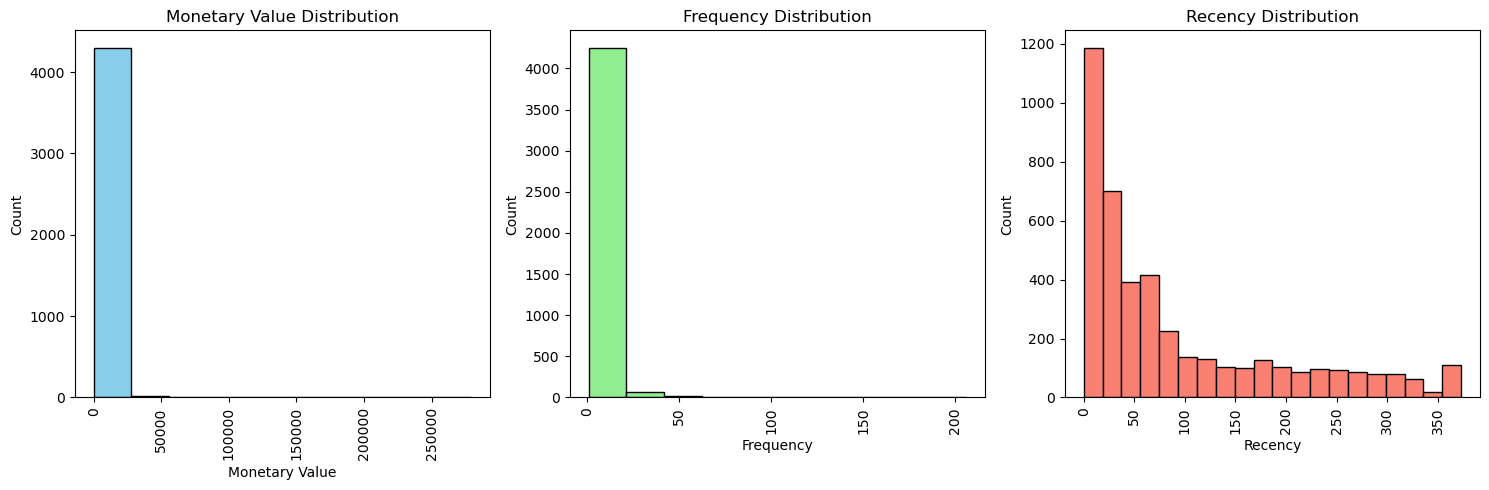

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregate['MonetoryValue'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.xticks(rotation = 90)

plt.subplot(1, 3, 2)
plt.hist(aggregate['Frequency'], bins = 10, color = 'lightgreen', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation = 90)

plt.subplot(1, 3, 3)
plt.hist(aggregate['Recency'], bins = 20, color = 'salmon', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

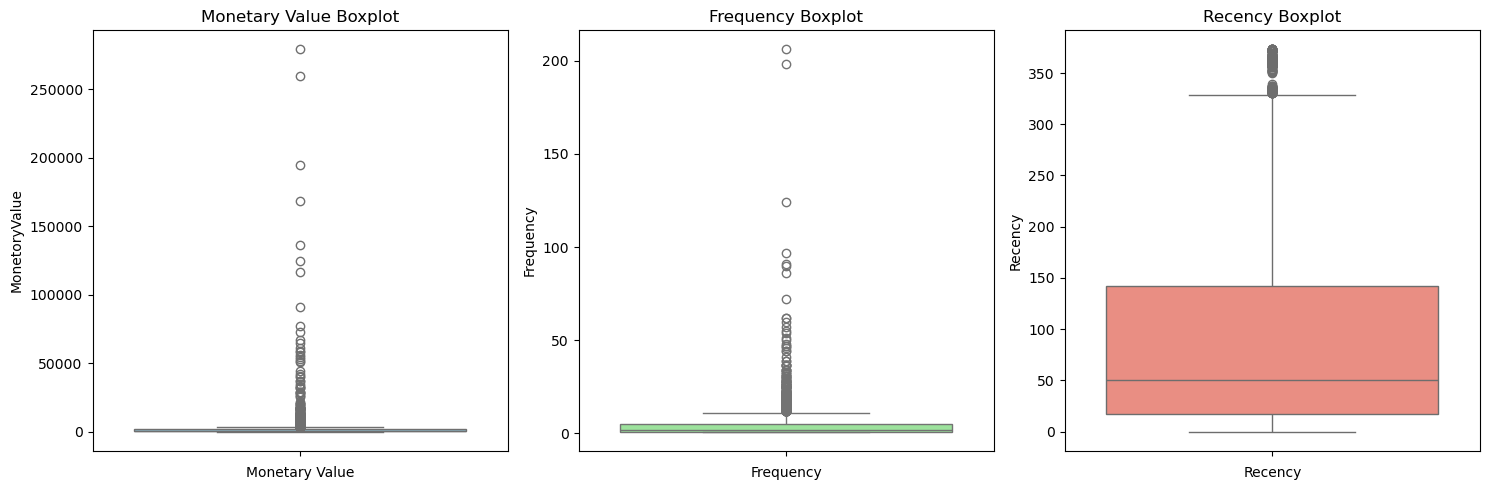

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregate['MonetoryValue'], color = 'skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data = aggregate['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = aggregate['Recency'], color = 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [32]:
M_Q1 = aggregate['MonetoryValue'].quantile(0.25)
M_Q3 = aggregate['MonetoryValue'].quantile(0.75)

M_IQR = M_Q3 - M_Q1
monetory_outlier = aggregate[(aggregate["MonetoryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregate["MonetoryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()
monetory_outlier.describe()

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate,Recency
count,425.00,425.00,425.00,425,425.00
mean,15033.64,12568.00,16.65,2011-11-14 08:29:09.741176576,24.72
min,12346.00,3622.68,1.00,2010-12-02 15:27:00,0.00
25%,13324.00,4359.32,8.00,2011-11-15 14:22:00,3.00
50%,15005.00,5891.61,12.00,2011-11-29 12:09:00,10.00
75%,16655.00,9430.52,19.00,2011-12-06 12:09:00,23.00
max,18251.00,279138.02,206.00,2011-12-09 12:49:00,371.00
std,1797.85,26097.90,19.07,NaN,47.08


In [33]:
F_Q1 = aggregate['Frequency'].quantile(0.25)
F_Q3 = aggregate['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers = aggregate[(aggregate['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregate['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers.describe()

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate,Recency
count,278.00,278.00,278.00,278,278.00
mean,15355.67,14488.01,23.09,2011-11-25 21:49:19.640287744,13.17
min,12395.00,1296.44,12.00,2010-12-02 15:27:00,0.00
25%,13880.25,4197.77,13.00,2011-11-23 20:17:15,2.00
50%,15290.50,6283.52,17.00,2011-12-03 13:42:00,5.50
75%,16781.25,11040.84,25.00,2011-12-07 12:15:30,15.00
max,18283.00,279138.02,206.00,2011-12-09 12:49:00,371.00
std,1745.00,30142.78,21.17,NaN,30.37


In [34]:
non_outlier = aggregate[(~aggregate.index.isin(monetory_outlier.index)) & (~aggregate.index.isin(frequency_outliers.index))]
non_outlier.describe()

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate,Recency
count,3863.00,3863.00,3863.00,3863,3863.00
mean,15323.85,853.81,2.76,2011-08-31 01:42:04.721718784,99.94
min,12348.00,3.75,1.00,2010-12-01 09:53:00,0.00
25%,13850.50,278.50,1.00,2011-07-01 15:21:00,21.00
50%,15333.00,570.46,2.00,2011-10-11 14:24:00,58.00
75%,16798.00,1187.01,4.00,2011-11-17 13:39:00,160.00
max,18287.00,3619.17,11.00,2011-12-09 12:50:00,373.00
std,1709.73,794.61,2.17,NaN,101.87


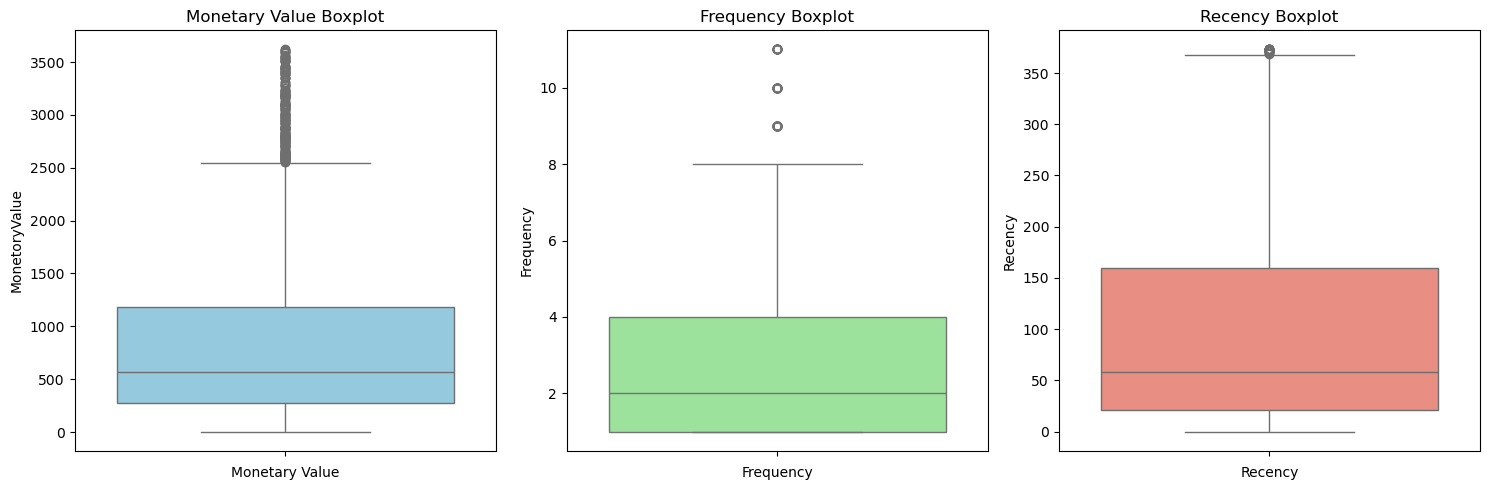

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outlier['MonetoryValue'], color = 'skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data = non_outlier['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = non_outlier['Recency'], color = 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

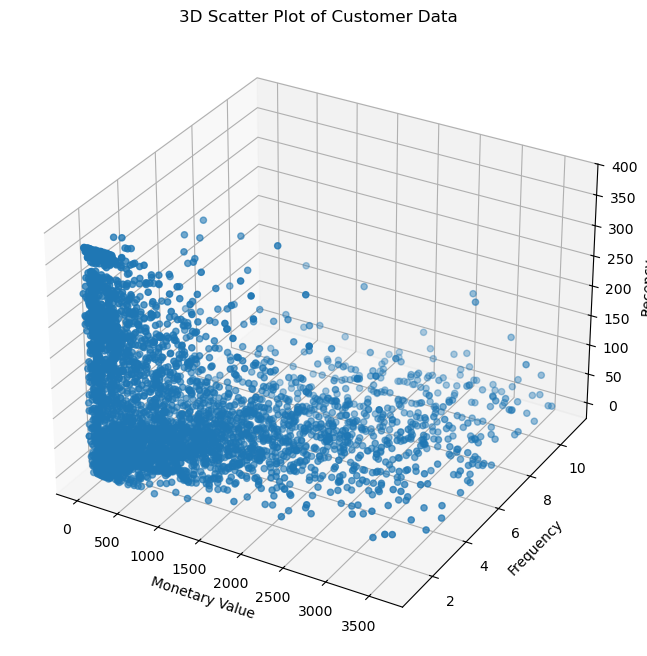

In [36]:
fig = plt.figure(figsize = [8, 8])

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outlier["MonetoryValue"], non_outlier["Frequency"], non_outlier["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outlier[["MonetoryValue", "Frequency", "Recency"]])
scaled_data

array([[ 0.73432565,  0.57425162, -0.25471707],
       [ 0.75988873, -0.8096124 , -0.80452635],
       [-0.70410412, -0.8096124 ,  2.05251827],
       ...,
       [-0.97292551, -0.8096124 ,  0.78599334],
       [-0.85054746, -0.34832439, -0.9125246 ],
       [ 1.23783397,  0.11296362, -0.5688938 ]])

In [38]:
scaled_data = pd.DataFrame(scaled_data, index = non_outlier.index, columns = ("MonetoryValue", "Frequency", "Recency"))
scaled_data

,MonetoryValue,Frequency,Recency
2,0.73,0.57,-0.25
3,0.76,-0.81,-0.80
4,-0.70,-0.81,2.05
5,0.67,1.96,-0.64
6,-0.96,-0.81,1.01
...,...,...,...
4328,-0.86,-0.81,-0.26
4329,-0.85,-0.81,1.74
4330,-0.97,-0.81,0.79
4331,-0.85,-0.35,-0.91


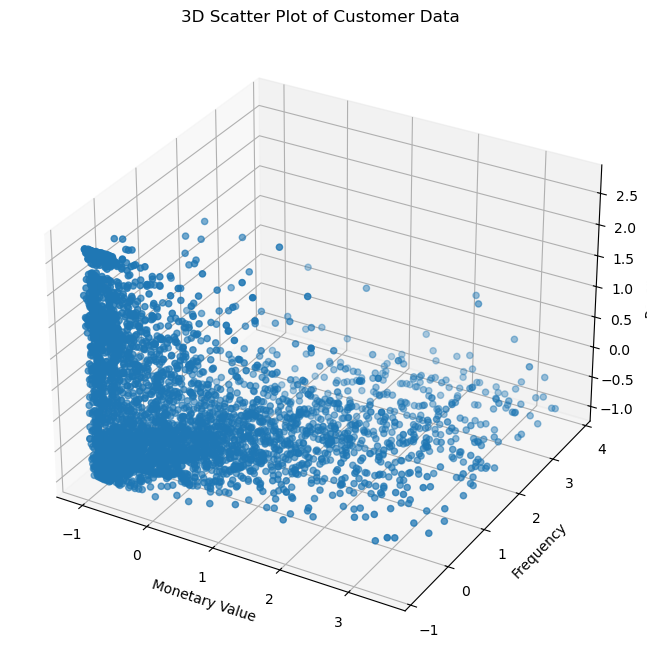

In [39]:
fig = plt.figure(figsize = [8, 10])
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(scaled_data["MonetoryValue"], scaled_data["Frequency"], scaled_data["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

##### K Means Clustering

In [40]:
import warnings
warnings.filterwarnings('ignore')

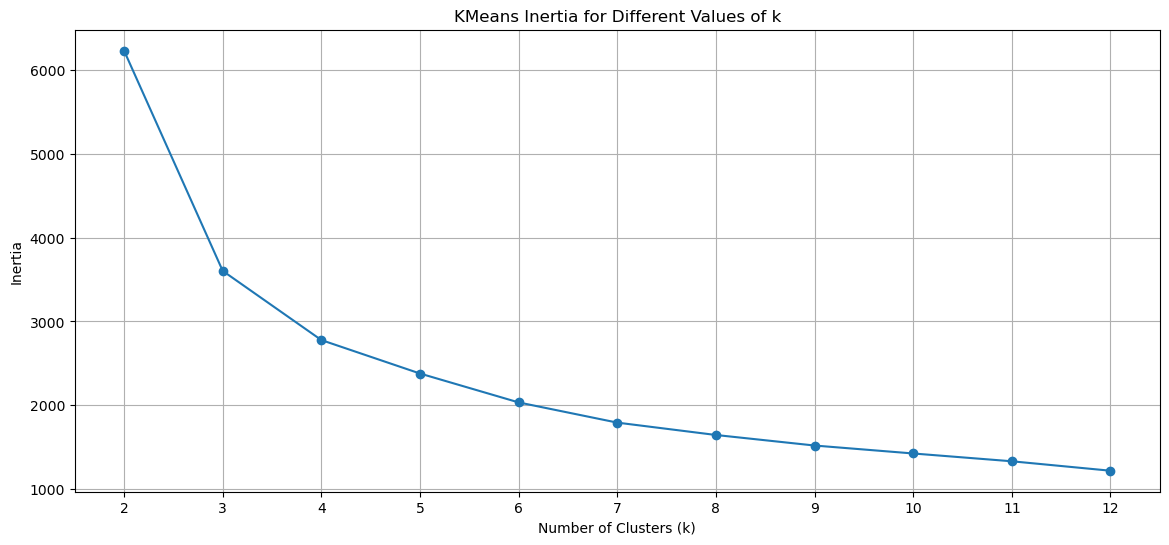

In [41]:
max_k = 12

inertia = []
k_values = range(2, max_k + 1)

for k in k_values :
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)
    kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = [14, 6])
plt.plot(k_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

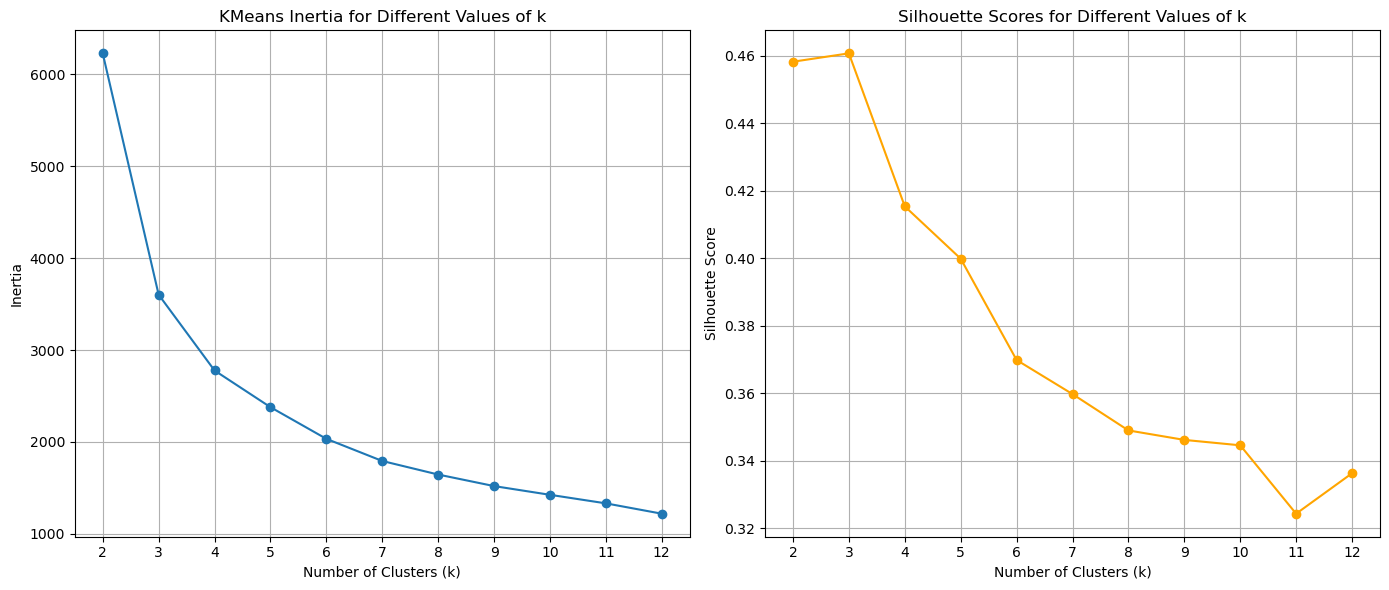

In [42]:
max_k = 12
inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)
    cluster_labels = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, cluster_labels)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = [14, 6])

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [43]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_labels

array([3, 0, 1, ..., 1, 0, 3])

In [44]:
non_outlier["Cluster"] = cluster_labels
non_outlier.head()

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1


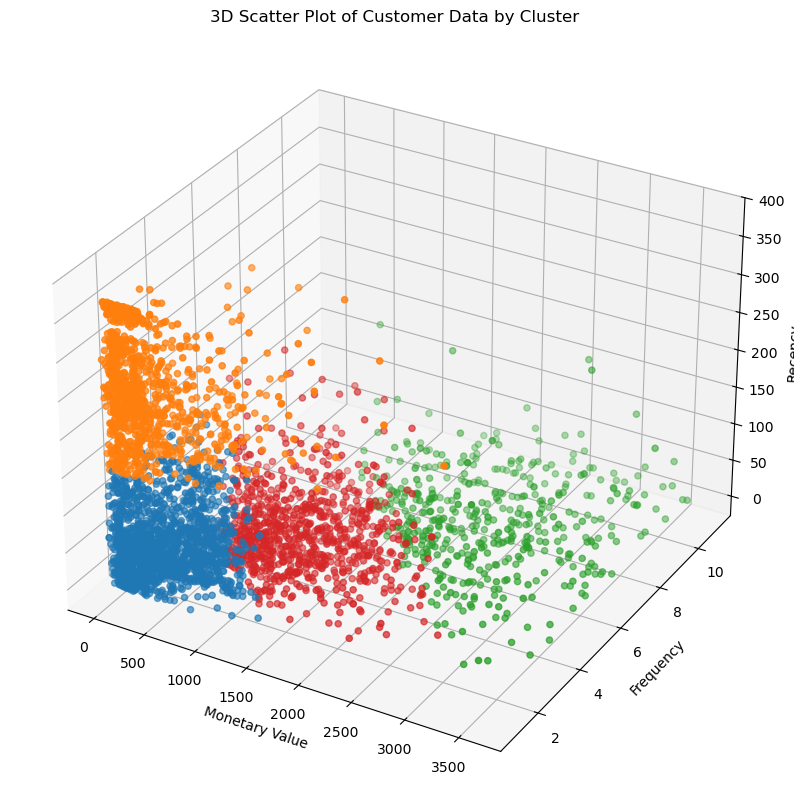

In [45]:
cluster_colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728'} 
colors = non_outlier['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = [10, 10])
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outlier['MonetoryValue'], 
                     non_outlier['Frequency'], 
                     non_outlier['Recency'], 
                     c = colors,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

    Cluster 0 (Blue): "Loyalty"
    
    Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
    Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.
    Cluster 1 (Orange): "Reconnect"
    
    Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
    Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.
    Cluster 2 (Green): "Cultivate"
    
    Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
    Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.
    Cluster 3 (Red): "Appreciate"
    
    Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
    Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.
    Summary of Revised Cluster Names:
    Cluster 0 (Blue): "Loyalty"
    Cluster 1 (Orange): "Reconnect"
    Cluster 2 (Green): "Cultivate"
    Cluster 3 (Red): "Appreciate"

In [46]:
overlap_indices = monetory_outlier.index.intersection(frequency_outliers.index)

monetary_only = monetory_outlier.drop(overlap_indices)
frequency_only = frequency_outliers.drop(overlap_indices)
monetary_and_frequency = monetory_outlier.loc[overlap_indices]

monetary_only["Cluster"] = -1
frequency_only["Cluster"] = -2
monetary_and_frequency["Cluster"] = -3

outlier_cluster = pd.concat([monetary_only, frequency_only, monetary_and_frequency])

outlier_cluster

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.00,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.00,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.00,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.00,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3


In [100]:
cluster_labels = {  
    0: "Loyal",  
    1: "Reconnect",  
    2: "Engagement",  
    3: "Incentivize",  
    -1: "Treat",  
    -2: "Promote",  
    -3: "Elevate"  
}  

In [101]:
full_clustering_df = pd.concat([non_outlier, outlier_cluster])
full_clustering_df

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3


In [102]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)
full_clustering_df

,CustomerID,MonetoryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3,REWARD
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0,RETAIN
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1,RE-ENGAGE
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2,NURTURE
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1,RE-ENGAGE
...,...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3,DELIGHT
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3,DELIGHT
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3,DELIGHT
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3,DELIGHT


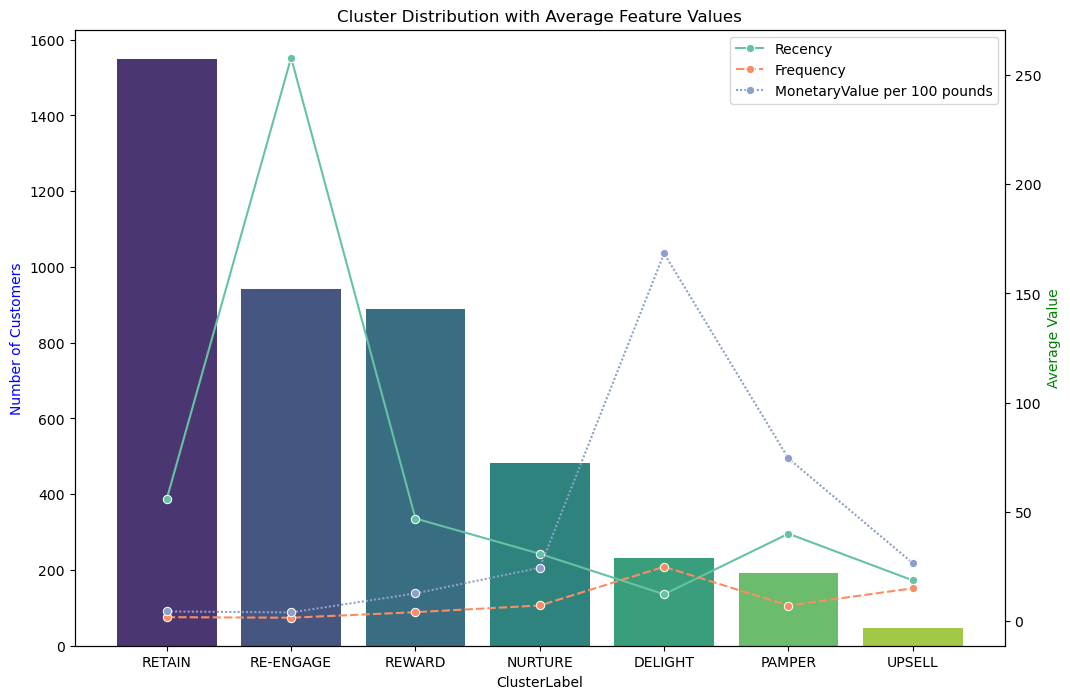

In [103]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetoryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()